YOLO

In [1]:
import cv2
import numpy as np 
from ultralytics import YOLO
import matplotlib.pyplot as plt 

Run inferences on an image

In [2]:
model = YOLO('yolov8n-seg.pt')

In [3]:
# Load the image 
image_path = 'highway_input1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

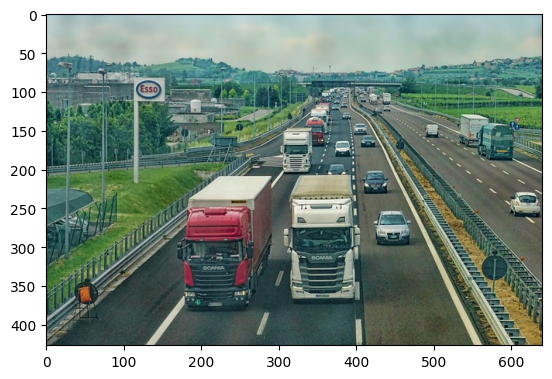

In [4]:
plt.imshow(image)

In [5]:
results = model.predict(image_path, conf=0.5)


image 1/1 /home/cfdml-04/Desktop/Gaurav_data/Report_related_coding/YoLo/highway_input1.jpg: 448x640 4 cars, 1 bus, 2 trucks, 87.8ms
Speed: 1.2ms preprocess, 87.8ms inference, 7.0ms postprocess per image at shape (1, 3, 448, 640)


In [6]:
masks = results[0].masks.data.cpu().numpy()
boxes = results[0].boxes.xyxy.cpu().numpy()
class_ids = results[0].boxes.cls.cpu().numpy()
class_names = model.names

In [7]:
# Overlay masks on the image
for mask in masks:
    mask_resized = cv2.resize(mask.astype(np.uint8), (image.shape[1], image.shape[0]))
    mask_colored = cv2.merge([mask_resized * 255] * 3)  # Convert to 3-channel RGB
    image = cv2.addWeighted(image, 1, mask_colored, 0.5, 0)

In [8]:
# Draw bounding boxes and labels on the image
for box, class_id in zip(boxes, class_ids):
    x1, y1, x2, y2 = map(int, box)
    label = class_names[int(class_id)]
    color = (255, 0, 0)  # Red color for bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

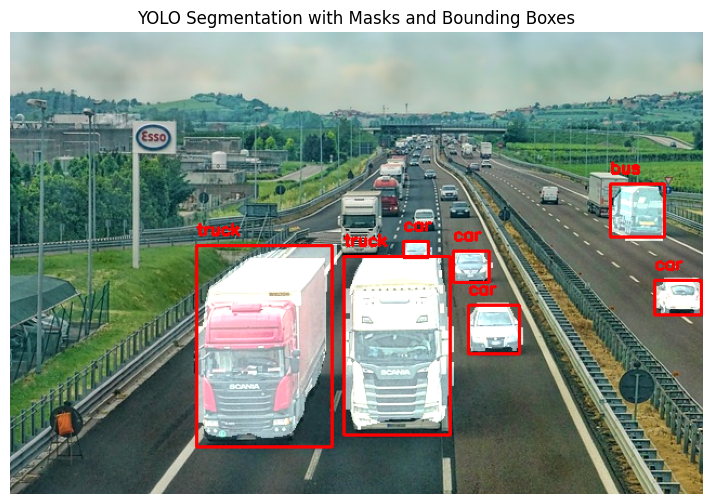

In [10]:
# Display the segmented image with masks and bounding boxes
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.title("YOLO Segmentation with Masks and Bounding Boxes")
plt.savefig('Yolo_output1.png')
plt.show()